In [ ]:
#q4
#heat equation
#4.1

import numpy as np
import matplotlib.pyplot as plt
import math

import time





def f(x):
    return x*(1-x)

def plot(h):

    mu = 0.55
    k = mu*(h**2)
    x = np.arange(0,1+h,h)
    t = np.arange(0,10+k,k)
    n = len(x)
    m = len(t)
    p = n-2
    T = np.zeros((n,m))
    I = np.eye(p)
    
    # Set up the tridiagonal matrix A
    A = np.zeros((p, p))
    np.fill_diagonal(A, 2)
    np.fill_diagonal(A[1:], -1)
    np.fill_diagonal(A[:, 1:], 1)

    L = I-(mu*A)
    w_0 = np.zeros((p,1))
    W = np.zeros((n,n))

    for i in range(1,p-1):
        w_0[i-1] = f(x[i])
        W[i][0] = w_0[i-1]

    w = w_0
    for i in range(2,n+1):
        w_i = L@w
        W[:,i-1][1:p+1] = w_i.T
        w = w_i
    
    #print(W)    
    for i in range(0,n):
        plt.plot(x,W[:,i])
    #plt.legend(t)
    plt.xlabel("x")
    plt.ylabel("u")
    plt.title("Numerical solution, h = "+str(h))
    plt.show()
H = [0.1,0.01,0.001]
for h in H:
    plot(h)
    plt.figure()

<Figure size 640x480 with 0 Axes>

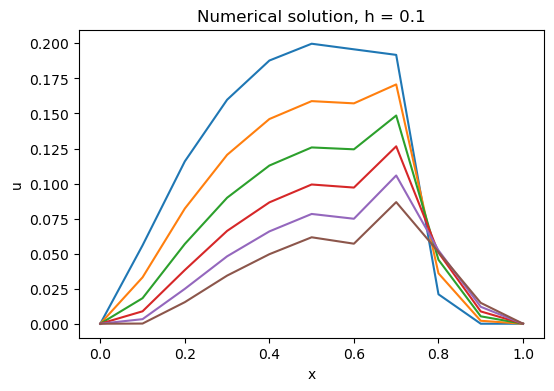

No. of iterations: 17
Elapsed time: 0.0823 seconds


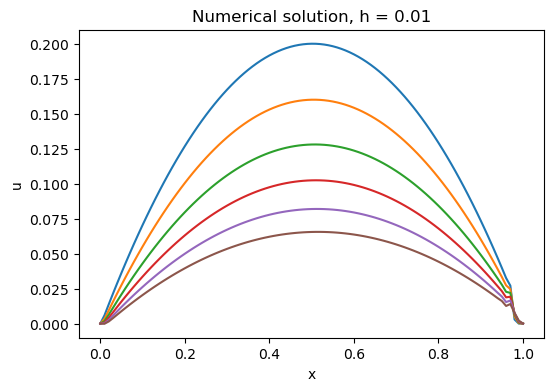

No. of iterations: 197
Elapsed time: 0.1188 seconds


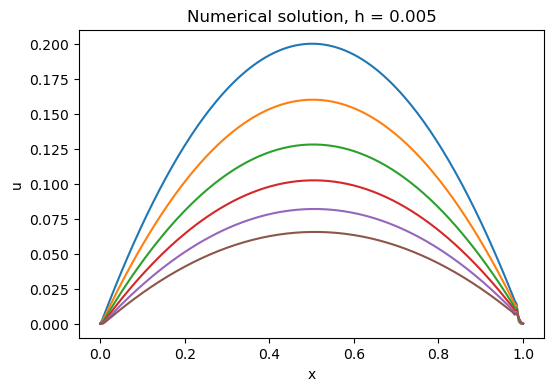

No. of iterations: 397
Elapsed time: 0.0992 seconds


In [1]:

#4.2

import numpy as np
import matplotlib.pyplot as plt
import math
# timer.py

import time

class TimerError(Exception):
    """A custom exception used to report errors in use of Timer class"""

class Timer:
    def __init__(self):
        self._start_time = None

    def start(self):
        """Start a new timer"""
        if self._start_time is not None:
            raise TimerError(f"Timer is running. Use .stop() to stop it")

        self._start_time = time.perf_counter()

    def stop(self):
        """Stop the timer, and report the elapsed time"""
        if self._start_time is None:
            raise TimerError(f"Timer is not running. Use .start() to start it")

        elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None
        print(f"Elapsed time: {elapsed_time:0.4f} seconds")
        
def f(x):
    return x*(1-x)

def plot(h):

    mu = 0.1
    k = mu*(h**2)
    x = np.arange(0,1+h,h)
    t = np.arange(0,10+k,k)
    a = 1
    n = len(x)
    m = len(t)
    p = n-2
    T = np.zeros((n,m))
    I = np.eye(p)
    
    # Set up the tridiagonal matrix A
    A = np.zeros((p, p))
    np.fill_diagonal(A, 2)
    np.fill_diagonal(A[1:], -1)
    np.fill_diagonal(A[:, 1:], 1)

    L = I-(mu*A)
    w_0 = np.zeros((p,1))
    W = np.zeros((n,n))

    for i in range(1,p-1): #p-2 iterations here
        w_0[i-1] = f(x[i])
        W[i][0] = w_0[i-1]

    w = w_0
    for i in range(2,n+1): #n-1 iterations here
        w_i = L@w -(a*k*w)
        W[:,i-1][1:p+1] = w_i.T
        w = w_i
    plt.figure(figsize=(6, 4))   
    for i in range(1,7):
        plt.plot(x,W[:,i])
    
    plt.xlabel("x")
    plt.ylabel("u")
    plt.title("Numerical solution, h = "+str(h))
    plt.show()
    print("No. of iterations:",p-2+n-1) #total number of iterations
H = [0.1,0.01,0.005]
plt.suptitle("Explicit euler method for time discretization")
for h in H:
    t = Timer()
    t.start()
    plot(h)
    t.stop()
    #plt.figure()


<Figure size 640x480 with 0 Axes>

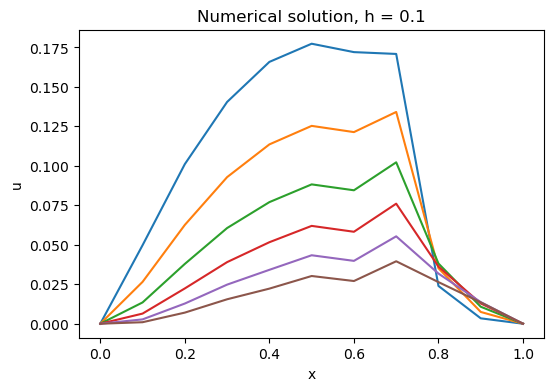

No. of iterations: 17
Elapsed time: 0.1263 seconds


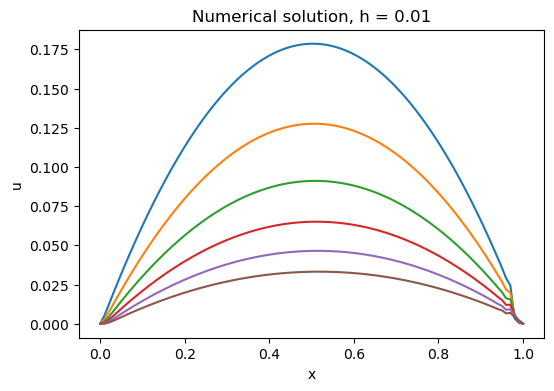

No. of iterations: 197
Elapsed time: 0.1267 seconds


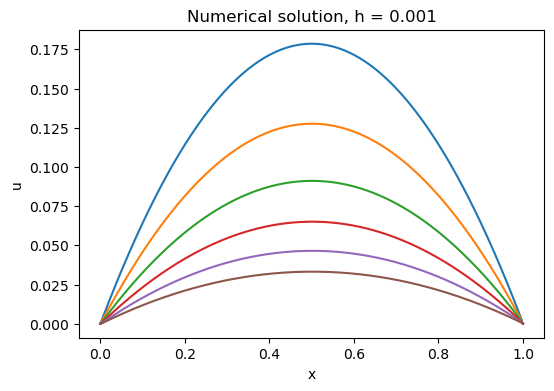

No. of iterations: 1997
Elapsed time: 0.3741 seconds


In [2]:

#4.3

import numpy as np
import matplotlib.pyplot as plt
import math
def f(x):
    return x*(1-x)

def plot(h):

    mu = 0.2
    k = mu*(h**2)
    x = np.arange(0,1+h,h)
    t = np.arange(0,10+k,k)
    a = 1
    n = len(x)
    m = len(t)
    p = n-2
    T = np.zeros((n,m))
    I = np.eye(p)
    
    # Set up the tridiagonal matrix A
    A = np.zeros((p, p))
    np.fill_diagonal(A, 2)
    np.fill_diagonal(A[1:], -1)
    np.fill_diagonal(A[:, 1:], 1)

    L = I+(mu*A)
    L = np.linalg.inv(L)
    w_0 = np.zeros((p,1))
    W = np.zeros((n,n))

    for i in range(1,p-1):
        w_0[i-1] = f(x[i])
        W[i][0] = w_0[i-1]

    w = w_0
    for i in range(2,n+1):
        w_i = L@(w-(a*k*w))
        W[:,i-1][1:p+1] = w_i.T
        w = w_i
        
    plt.figure(figsize=(6, 4))
    for i in range(1,7):
        
        plt.plot(x,W[:,i])
    #plt.legend(t)
    plt.xlabel("x")
    plt.ylabel("u")
    plt.title("Numerical solution, h = "+str(h))
    plt.show()
    print("No. of iterations:",p-2+n-1) #total number of iterations
H = [0.1,0.01,0.001]
plt.suptitle("Implicit euler method for time discretization")
for h in H:
    t = Timer()
    t.start()
    plot(h)
    t.stop()
    #plt.figure()

In [ ]:
# 5.1 solve using FDM

import numpy as np
import matplotlib.pyplot as plt

def solve_BVP(h):
    
    x = np.arange(0, 1+h, h)
    N = len(x)
    # Set up the tridiagonal matrix A
    A = np.zeros((N, N))
    np.fill_diagonal(A, 2.0)
    np.fill_diagonal(A[1:], -1.0)
    np.fill_diagonal(A[:, 1:], -1.0)
    
    # RHS vector: F
    F = (h**2)* x *(1 - x)
    F[0] = F[-1] = 0  # apply boundary conditions
    
    # solve the linear system AU = F
    U = np.linalg.inv(A)@F
    return x, U

# Choose the number of grid points
H = [0.1,0.01,0.005]

for h in H:
    x, u_num = solve_BVP(h)
    plt.plot(x, u_num,"blue",linestyle = 'dotted',linewidth = 3)
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.title('Numerical Solution, h = '+str(h))
    plt.grid()
    plt.show()
    plt.figure()


In [ ]:
#5.2 shooting and secant method

import numpy as np
import matplotlib.pyplot as plt


x_i = 0
x_f = 1
h = 0.01
x = np.arange(x_i,x_f+h,h)
n = len(x)
u_i = 0
u_f = 0
def f(x, u, z):

    return -x * (1 - x)



def RK2(u_i, zi): 
    u = np.zeros(n)
    z = np.zeros(n)
    u[0] = u_i
    z[0] = zi

    for i in range (0,n - 1):
        k1 = z[i]
        r1 = f(x[i], u[i], z[i])
        k2 = z[i] + h * r1
        r2 = f(x[i] + h, u[i] + k1 * h, z[i] + r1 * h)
        u[i + 1] = u[i] + (h / 2) * (k1 + k2)
        z[i + 1] = z[i] + (h / 2) * (r1 + r2)
    return u

zt = np.zeros(2)
zt[0] = 1
zt[1] = 2
u_n = np.zeros(2)
for i in range(2):
    u = RK2(u_i, zt[i])
    u_n[i] = u[n-1]

zc = zt[0] + (zt[1] - zt[0]) * (u_f - u_n[0]) / (u_n[1] - u_n[0])
u = RK2(u_i, zc)
plt.plot(x,u,'purple',linestyle = 'dotted',linewidth = 3)
plt.title('Numerical Solution using shooting method')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid()

plt.show()
